<a href="https://colab.research.google.com/github/Vaishnavi-TCD/TCD/blob/main/CV_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dataset Selection | CIFAR - 10

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training data shape |  (50000, 32, 32, 3)
Test data shape |  (10000, 32, 32, 3)
Single image shape |  (32, 32, 3)
Label shape |  (50000, 1)
Number of classes |  10
Class labels |  [0 1 2 3 4 5 6 7 8 9]


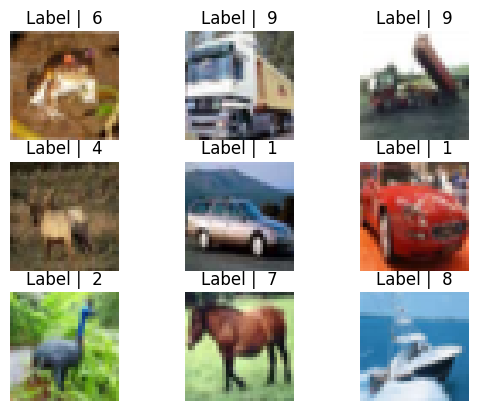

Summary fo the dataset | 
Number of Training Samples |  50000
x_train datatype |  uint8
y_train datatype |  uint8
NUmber of Test samples |  10000
Shape of the Images |  (32, 32, 3)
Number of Classes int he Dataset |  10
Pixel value range in training set | Min = 0 Max = 255


In [2]:
# Dataset Pre Processing
# Loading and Visualizing the dataset

from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Training data shape | ", x_train.shape)
print("Test data shape | ", x_test.shape)

print("Single image shape | ", x_train[0].shape)
print("Label shape | ", y_train.shape)


num_classes = len(np.unique(y_train))
print("Number of classes | ", num_classes)
print("Class labels | ", np.unique(y_train))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(f"Label |  {y_train[i][0]}")
    plt.axis('off')
plt.show()

print("Summary fo the dataset | ")
print("Number of Training Samples | ", len(x_train))
# print("Number of Validation Samples | ", len(x_val) if 'x_val' in locals() else "None")
print("x_train datatype | ", x_train.dtype)
print("y_train datatype | ", y_train.dtype)
print("NUmber of Test samples | ", len(x_test))
print("Shape of the Images | ", x_train[0].shape)
print("Number of Classes int he Dataset | ", num_classes)
print("Pixel value range in training set | Min =", x_train.min(), "Max =", x_train.max())

In [ ]:
# model building and training
# loading the CIFAR - 10 dataset containing images as given in the summary above
# Performed normalization of the pixel values to scale them to [0,1] for faster traning and better convergence
# One hot encoding on the dataset's labels to convert integers 0,9 to vectors [0,1,0,0,0,0,0,0,0]


# Implemented data augmentation to increase data diversity as follows:
  # Randomly rotated images within a range of ±15 degrees
  # Randomly shifted the image by 10%
  # Randomly flipping the images horizontally

In [ ]:
# Matching the model building and traning requirements by doing the following:
# Six total convolution layers with 2 each in 3 blocks with 32, 64 and 128 filters
# Added MaxPooling at each block to reduce dimensionality
# Added batch normalization and drop out at each block to help avoid overfitting
# Implemented ReLU and Softmax layer for 10 class classification
# Model is trained for 50 epochs
# Adam Optimizer is used with 0.001 learning rate
# CIFAR - 10 by deafult has 80/20 split for traning and validation dataset
# Categorical crossentropy is implemented for multi-class classification
# ReduceLROnPlateau reduces the learning rate by 0.5 if the validation loss does not show improvement for consecutive 3 epochs
# Added EarlyStopping to stop the traning once it's seen that the validation loss is not improving for 10 epochs

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(10, activation='softmax')
])


optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(x_test, y_test),
    steps_per_epoch=x_train.shape[0] // 64,
    callbacks=[reduce_lr, early_stopping]
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 63s 64ms/step - accuracy: 0.3392 - loss: 2.0129 - val_accuracy: 0.5732 - val_loss: 1.1952 - learning_rate: 0.0010
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5000 - loss: 1.5314

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step - accuracy: 0.5000 - loss: 1.5314 - val_accuracy: 0.5745 - val_loss: 1.1910 - learning_rate: 0.0010
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 63s 51ms/step - accuracy: 0.5592 - loss: 1.2358 - val_accuracy: 0.6480 - val_loss: 0.9884 - learning_rate: 0.0010
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6094 - loss: 1.2515 - val_accuracy: 0.6509 - val_loss: 0.9806 - learning_rate: 0.0010
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.6288 - loss: 1.0422 - val_accuracy: 0.6344 - val_loss: 1.0683 - learning_rate: 0.0010
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - accuracy: 0.5625 - loss: 1.2230 - val_accuracy: 0.6379 - val_loss: 1.0567 - learning_rate: 0.0010
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.6765 - loss: 0.9256 - val_accuracy: 0.6752 - val_loss: 0.9710 - learning_rate: 0.0010
Epoch 8/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - accuracy: 0.7500 - loss: 0.7937 -

In [ ]:

model.save('cnn_image_classifier.h5')
print("Model saved successfully | 'cnn_image_classifier.h5'")


Model saved successfully as 'cnn_image_classifier.h5'


In [ ]:
# Evaluation
# Classification accuracy, precision, recall and f1-score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
report = classification_report(y_true, y_pred_classes)
print("Classification Report: \n", report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1000
           1       0.93      0.94      0.94      1000
           2       0.83      0.78      0.80      1000
           3       0.78      0.65      0.71      1000
           4       0.81      0.86      0.84      1000
           5       0.86      0.71      0.78      1000
           6       0.76      0.96      0.85      1000
           7       0.89      0.90      0.89      1000
           8       0.92      0.91      0.92      1000
           9       0.87      0.95      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



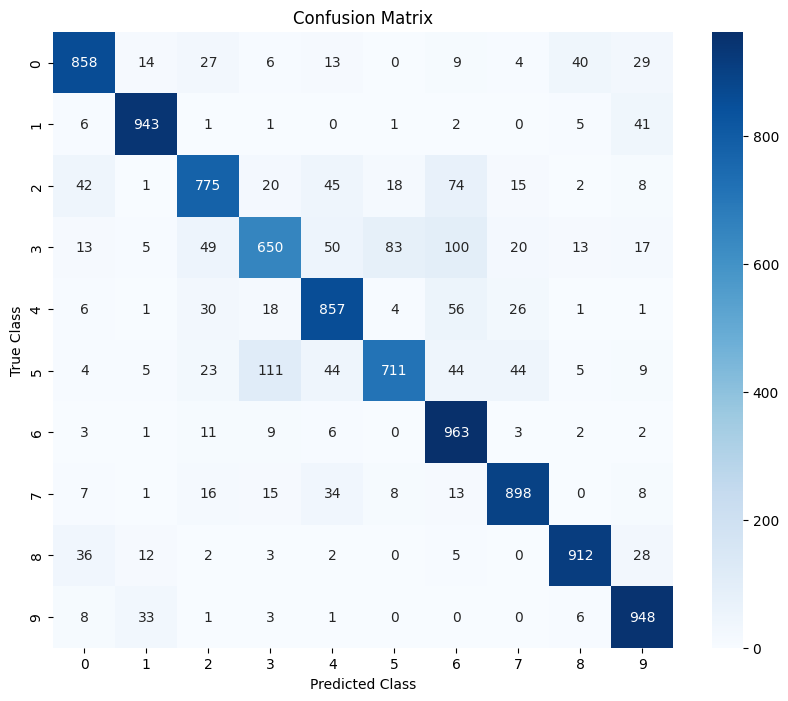

In [ ]:
# Confusion Matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()


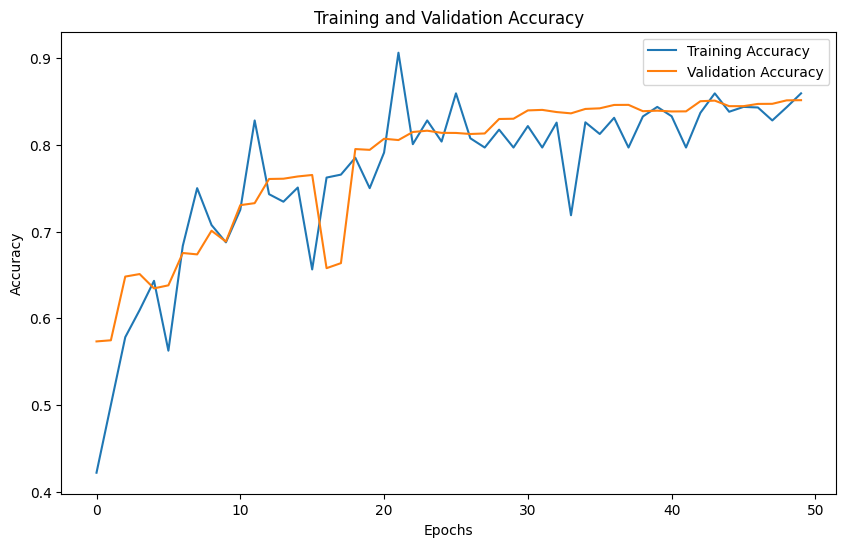

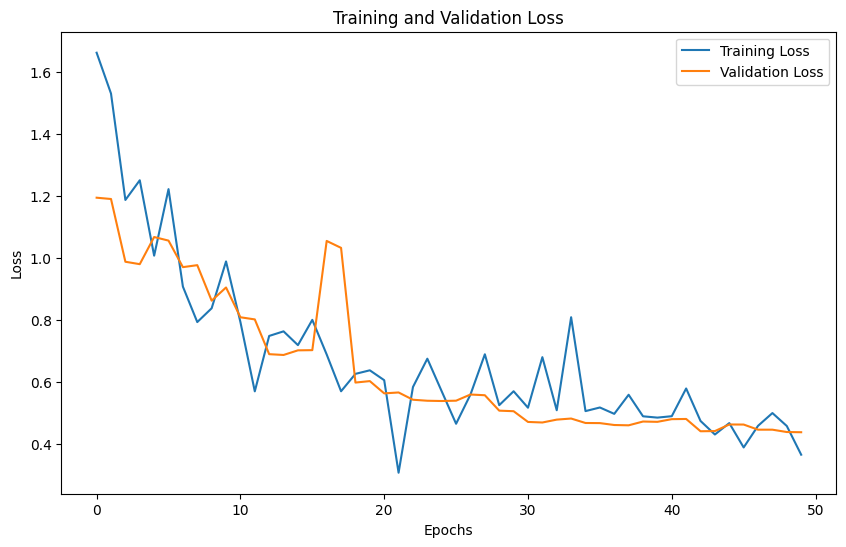

In [ ]:
# Training and Validation loss and acuraccy plots
lt.figure(figsize=(10, 6))
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Hyper parameter testing
######## Playing with the learning rate, changing initial learning rate from 0.001 to 0.01 to see if the model converges faster

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(10, activation='softmax')
])


optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(x_test, y_test),
    steps_per_epoch=x_train.shape[0] // 64,
    callbacks=[reduce_lr, early_stopping]
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 58s 58ms/step - accuracy: 0.3305 - loss: 1.9104 - val_accuracy: 0.4175 - val_loss: 1.8259 - learning_rate: 0.0100
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.4375 - loss: 1.5590

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - accuracy: 0.4375 - loss: 1.5590 - val_accuracy: 0.4047 - val_loss: 1.8744 - learning_rate: 0.0100
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 64s 46ms/step - accuracy: 0.5625 - loss: 1.2283 - val_accuracy: 0.6042 - val_loss: 1.2442 - learning_rate: 0.0100
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5625 - loss: 1.2476 - val_accuracy: 0.5862 - val_loss: 1.3012 - learning_rate: 0.0100
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.6405 - loss: 1.0317 - val_accuracy: 0.6951 - val_loss: 0.9097 - learning_rate: 0.0100
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.6094 - loss: 0.9919 - val_accuracy: 0.6820 - val_loss: 0.9553 - learning_rate: 0.0100
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.6765 - loss: 0.9394 - val_accuracy: 0.6754 - val_loss: 1.0174 - learning_rate: 0.0100
Epoch 8/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6094 - loss: 1.1705
Ep

In [ ]:
# Takeaway: Both learning rates achieved the same final test accuracy
# LR 0.001 provides smoother convergence and final accuracy of 85.15% with no large fluctuations
# LR 0.01 provides faster convergence and some fluctuations in the early stage
# LR 0.001 provided stability, with gradual convergence and smooth loss reduction
# LR 0.01 provided faster convergence, but requires more learning rate adjustments

In [3]:
# Changing the optimizer from Adam to SGD with momentum = 0.9, learning rate = 0.001 and with nesterov = True (look ahead?)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


model = Sequential([
    # Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    # BatchNormalization(),
    # MaxPooling2D((2, 2)),
    # Dropout(0.25),
    # Conv2D(64, (3, 3), activation='relu', padding='same'),
    # BatchNormalization(),
    # MaxPooling2D((2, 2)),
    # Dropout(0.25),
    # Flatten(),
    # Dense(128, activation='relu'),
    # BatchNormalization(),
    # Dropout(0.4),
    # Dense(10, activation='softmax')

    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(x_test, y_test),
    steps_per_epoch=x_train.shape[0] // 64,
    callbacks=[reduce_lr, early_stopping]
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy : {test_acc * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 59s 61ms/step - accuracy: 0.2550 - loss: 2.3847 - val_accuracy: 0.4630 - val_loss: 1.5099 - learning_rate: 0.0010
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5625 - loss: 1.4650

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5625 - loss: 1.4650 - val_accuracy: 0.4632 - val_loss: 1.4968 - learning_rate: 0.0010
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.4205 - loss: 1.5905 - val_accuracy: 0.5156 - val_loss: 1.3290 - learning_rate: 0.0010
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5469 - loss: 1.2225 - val_accuracy: 0.5139 - val_loss: 1.3390 - learning_rate: 0.0010
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.4798 - loss: 1.4221 - val_accuracy: 0.5169 - val_loss: 1.3716 - learning_rate: 0.0010
Epoch 6/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.3906 - loss: 1.5105
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - accuracy: 0.3906 - loss: 1.5105 - val_accuracy: 0.5171 - val_loss: 1.3644 - learning_rate: 0.0010
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - accuracy: 0.5298 - loss: 1.3003 - val

In [ ]:
# Adam gave faster convergence, higher final accuracy (85,15%, SGD 59.19%), smooth loss reduction and no large fluctuations
# ADam SGD with momentum depends on consistent updates whereas Adam adats learning rate for eahc parameter individually, making the adjustments faster and bigger jumps wherever necessary
# Although Adam's computation cost can be high, hence when working with large datasets SGD can be employed

In [ ]:
# Increasing the model depth
# Increase the Conv Layers from 3 to 4, initial conv blocks (32,64,128) --> increased conv blocks (32,63,128,256)
# Increased the number of dilters from 32,64,128 to 32,64,128,256
# Incrased the dense layers from 1 (128) to 2 dense layers (256, 128)
# Added more increased dropout (0.25, 0.4, 0.25, 0.5)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Build the enhanced CNN model (increased depth)
model = Sequential([

    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),


    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),


    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # 4th Convolutional Block (newly added)
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),


    Flatten(),
    Dense(256, activation='relu'),  # New dense layer added
    BatchNormalization(),
    Dropout(0.5),  # Increased dropout to prevent overfitting
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(10, activation='softmax')
])


optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(x_test, y_test),
    steps_per_epoch=x_train.shape[0] // 64,
    callbacks=[reduce_lr, early_stopping]
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy : {test_acc * 100:.2f}%")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 69s 67ms/step - accuracy: 0.2469 - loss: 2.2905 - val_accuracy: 0.4097 - val_loss: 1.7863 - learning_rate: 0.0010
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.4844 - loss: 1.5440

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4844 - loss: 1.5440 - val_accuracy: 0.4160 - val_loss: 1.7293 - learning_rate: 0.0010
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 56s 50ms/step - accuracy: 0.4795 - loss: 1.4275 - val_accuracy: 0.5091 - val_loss: 1.6143 - learning_rate: 0.0010
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4531 - loss: 1.4686 - val_accuracy: 0.5097 - val_loss: 1.6030 - learning_rate: 0.0010
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.5692 - loss: 1.2092 - val_accuracy: 0.5869 - val_loss: 1.2377 - learning_rate: 0.0010
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5312 - loss: 1.3100 - val_accuracy: 0.5777 - val_loss: 1.2681 - learning_rate: 0.0010
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.6326 - loss: 1.0605 - val_accuracy: 0.6535 - val_loss: 1.0050 - learning_rate: 0.0010
Epoch 8/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6250 - loss: 0.9743 - val_a

In [ ]:
# Original model test accuracy = 85.15%
# Increased depth model test accuracy = 85.64%  --> 0.49% improvement in test accuracy
# When the depth is increased the model has more capacity to learn complex features from the tranining dataset, which is beneficial with complex dataset
# As it can help in better generalization by reconginizing finer patterns
# However incase of simpler daatsets like CIFAR -10 the deeper model might not always significanlty outperform the shallower ones

In [4]:
# transfer learning with resnet50
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(x_test, y_test),
    steps_per_epoch=x_train.shape[0] // 64,
    callbacks=[reduce_lr, early_stopping]
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"ResNet50 Transfer Learning Test Accuracy: {test_acc * 100:.2f}%")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 64s 66ms/step - accuracy: 0.2687 - loss: 2.0208 - val_accuracy: 0.4133 - val_loss: 1.6505 - learning_rate: 0.0010
Epoch 2/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3125 - loss: 1.7412 - val_accuracy: 0.4143 - val_loss: 1.6505 - learning_rate: 0.0010
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 64s 54ms/step - accuracy: 0.3513 - loss: 1.8125 - val_accuracy: 0.4200 - val_loss: 1.6061 - learning_rate: 0.0010
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2969 - loss: 2.0687 - val_accuracy: 0.4221 - val_loss: 1.6038 - learning_rate: 0.0010
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.3763 - loss: 1.7529 - val_accuracy: 0.4466 - val_loss: 1.5601 - learning_rate: 0.0010
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4062 - loss: 1.7593 - val_accuracy: 0.4455 - val_loss: 1.5616 - learning_rate: 0.0010
Epoch 7/50
781/781 ━━━━━━━━━━━━

In [ ]:
# transfer learning implementation using ResNet 50 model
# Already pre trained model like ResNet 50 ideally leads to higher test accuracy than the custome CNN model
# I obtained test accuracy of 52.75% with ResNet 50 model which is lesser than the custom CNN model's test accuracy of 85.15%
# Posssible reasons for lower accuracy could be firstly the input size mismatch, ResNet50 is pre trained on ImageNet with input size of 244*244 whereas the CIFAR 10 dataset has size of 32*32
# but my attempts of trying and resizing the CIFAR 10 dataset images to the ize of 244*244 leads to complete usage of memory

In [ ]:
# I further also tried implementing the VGG model, after learning that VGG can adapt to ccept (32, 32, 3) inputs
# since its convolutional layers operate directly on images of this size.

In [1]:
# VGG attempt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            tf.config.experimental.set_virtual_device_configuration(
                gpu,
                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]
            )
    except RuntimeError as e:
        print(e)


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

from tensorflow.keras.applications.vgg16 import preprocess_input
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)


y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


for layer in base_model.layers:
    layer.trainable = False


model = Sequential([
    base_model,
    Flatten(),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(x_test, y_test),
    steps_per_epoch=x_train.shape[0] // 64,
    callbacks=[reduce_lr, early_stopping]
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"VGG16 Transfer Learning Test Accuracy: {test_acc * 100:.2f}%")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 54s 59ms/step - accuracy: 0.2353 - loss: 2.3351 - val_accuracy: 0.5566 - val_loss: 1.3362 - learning_rate: 1.0000e-04
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.4844 - loss: 1.4061

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4844 - loss: 1.4061 - val_accuracy: 0.5567 - val_loss: 1.3359 - learning_rate: 1.0000e-04
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.4403 - loss: 1.5997 - val_accuracy: 0.5923 - val_loss: 1.2005 - learning_rate: 1.0000e-04
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4688 - loss: 1.5973 - val_accuracy: 0.5921 - val_loss: 1.2004 - learning_rate: 1.0000e-04
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.4857 - loss: 1.4677 - val_accuracy: 0.6092 - val_loss: 1.1383 - learning_rate: 1.0000e-04
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5625 - loss: 1.3290 - val_accuracy: 0.6092 - val_loss: 1.1384 - learning_rate: 1.0000e-04
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.5121 - loss: 1.3858 - val_accuracy: 0.6206 - val_loss: 1.1077 - learning_rate: 1.0000e-04
Epoch 8/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.562

In [ ]:
# the following can be possibility why both the transfer learning model could not outperform the custom CNN model:
# Features learned on ImageNet might not transfer well to small CIFAR 10 images
# smaller input size of images in CIFAR 10 dataset (32,32,3)
# CGG and ResNet have too many parameters for CIFAR 10 which has only 60k samples